# What Makes A "Good" Movie? 

## (Working title, we can always change it)

### By: Amy Zheng and Daniel Holten

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Nec feugiat nisl pretium fusce id velit ut tortor pretium. In pellentesque massa placerat duis ultricies lacus sed. Id interdum velit laoreet id donec ultrices. Mattis aliquam faucibus purus in massa tempor nec. Et malesuada fames ac turpis egestas sed tempus. Nisl nunc mi ipsum faucibus. Libero nunc consequat interdum varius sit amet. Aliquam eleifend mi in nulla posuere sollicitudin aliquam. Aliquet lectus proin nibh nisl condimentum id. Quis risus sed vulputate odio ut enim blandit.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast, json
import seaborn as sns

from datetime import datetime

Explanation of all the imports

# Part 1: Data Collection

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Nec feugiat nisl pretium fusce id velit ut tortor pretium. In pellentesque massa placerat duis ultricies lacus sed. Id interdum velit laoreet id donec ultrices. Mattis aliquam faucibus purus in massa tempor nec. Et malesuada fames ac turpis egestas sed tempus. Nisl nunc mi ipsum faucibus. Libero nunc consequat interdum varius sit amet. Aliquam eleifend mi in nulla posuere sollicitudin aliquam. Aliquet lectus proin nibh nisl condimentum id. Quis risus sed vulputate odio ut enim blandit.

In [2]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')
print(credits.head())
print(movies.head())

   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3",

### Explanation of Data

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Nec feugiat nisl pretium fusce id velit ut tortor pretium. In pellentesque massa placerat duis ultricies lacus sed. Id interdum velit laoreet id donec ultrices. Mattis aliquam faucibus purus in massa tempor nec. Et malesuada fames ac turpis egestas sed tempus. Nisl nunc mi ipsum faucibus. Libero nunc consequat interdum varius sit amet. Aliquam eleifend mi in nulla posuere sollicitudin aliquam. Aliquet lectus proin nibh nisl condimentum id. Quis risus sed vulputate odio ut enim blandit.

# Part 2: Data Processing

In [3]:
# Cleaning data

#dropping irrelevant columns to make our dataset easier to analyze and concise
movies = movies.drop(axis=1, labels=['homepage', 'keywords', 'overview', 'tagline'])

#removing duplicate rows
movies = movies.drop_duplicates(keep='first')

#replacing budget/revenue cells that are 0 with NaN
movies[['budget', 'revenue']] = movies[['budget', 'revenue']].replace(0, np.nan)

#drops budget/revenue columns with missing data - can't do analysis on this
movies.dropna(subset=['budget', 'revenue'], inplace=True)

#changes release date to DateTime object
movies.release_date = pd.to_datetime(movies['release_date'])

In [4]:
#adding profit column = revenue - budget
movies['profit'] = movies['revenue'] - movies['budget']
movies['release_year'] = movies['release_date'].dt.year

In [5]:
# joins both datasets
movies = movies.join(credits.set_index('title'), on='original_title')
movies = movies.drop(axis=1, labels=['title']) #redundant column
movies.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,profit,release_year,movie_id,cast,crew
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,7.2,11800,2.550965e+09,2009,19995.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.9,4500,6.610000e+08,2007,285.0,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,6.3,4466,6.356746e+08,2015,206647.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,7.6,9106,8.349391e+08,2012,49026.0,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.1,2124,2.413910e+07,2012,49529.0,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
#parses column and converts it to a list. Gets rid of the id and other random info. associated with the name
def parse_col(column, key):
    for index,i in zip(movies.index, movies[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key])) 
        movies.loc[index,column]=str(list1)
    
parse_col('genres', 'name')
parse_col('production_companies', 'name')
parse_col('production_countries', 'name')
parse_col('spoken_languages', 'name')
#parse_col('cast', 'name')

movies.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,profit,release_year,movie_id,cast,crew
0,237000000.0,"[u'Action', u'Adventure', u'Fantasy', u'Scienc...",19995,en,Avatar,150.437577,"[u'Ingenious Film Partners', u'Twentieth Centu...","[u'United States of America', u'United Kingdom']",2009-12-10,2.787965e+09,162.0,"[u'English', u'Espa\xf1ol']",Released,7.2,11800,2.550965e+09,2009,19995.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000.0,"[u'Adventure', u'Fantasy', u'Action']",285,en,Pirates of the Caribbean: At World's End,139.082615,"[u'Walt Disney Pictures', u'Jerry Bruckheimer ...",[u'United States of America'],2007-05-19,9.610000e+08,169.0,[u'English'],Released,6.9,4500,6.610000e+08,2007,285.0,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000.0,"[u'Action', u'Adventure', u'Crime']",206647,en,Spectre,107.376788,"[u'Columbia Pictures', u'Danjaq', u'B24']","[u'United Kingdom', u'United States of America']",2015-10-26,8.806746e+08,148.0,"[u'Fran\xe7ais', u'English', u'Espa\xf1ol', u'...",Released,6.3,4466,6.356746e+08,2015,206647.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000.0,"[u'Action', u'Crime', u'Drama', u'Thriller']",49026,en,The Dark Knight Rises,112.312950,"[u'Legendary Pictures', u'Warner Bros.', u'DC ...",[u'United States of America'],2012-07-16,1.084939e+09,165.0,[u'English'],Released,7.6,9106,8.349391e+08,2012,49026.0,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000.0,"[u'Action', u'Adventure', u'Science Fiction']",49529,en,John Carter,43.926995,[u'Walt Disney Pictures'],[u'United States of America'],2012-03-07,2.841391e+08,132.0,[u'English'],Released,6.1,2124,2.413910e+07,2012,49529.0,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Part 3: Exploratory Analysis and Data Viz

In [7]:
#Top 5 Most expensive movies
expensive_movies_df = movies.sort_values(by='budget', ascending=False).head()
expensive_movies_df.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,profit,release_year,movie_id,cast,crew
17,380000000.0,"[u'Adventure', u'Action', u'Fantasy']",1865,en,Pirates of the Caribbean: On Stranger Tides,135.413856,"[u'Walt Disney Pictures', u'Jerry Bruckheimer ...",[u'United States of America'],2011-05-14,1.045714e+09,136.0,"[u'English', u'Espa\xf1ol']",Released,6.4,4948,6.657138e+08,2011,1865.0,"[{""cast_id"": 15, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de..."
1,300000000.0,"[u'Adventure', u'Fantasy', u'Action']",285,en,Pirates of the Caribbean: At World's End,139.082615,"[u'Walt Disney Pictures', u'Jerry Bruckheimer ...",[u'United States of America'],2007-05-19,9.610000e+08,169.0,[u'English'],Released,6.9,4500,6.610000e+08,2007,285.0,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
7,280000000.0,"[u'Action', u'Adventure', u'Science Fiction']",99861,en,Avengers: Age of Ultron,134.279229,"[u'Marvel Studios', u'Prime Focus', u'Revoluti...",[u'United States of America'],2015-04-22,1.405404e+09,141.0,[u'English'],Released,7.3,6767,1.125404e+09,2015,99861.0,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
10,270000000.0,"[u'Adventure', u'Fantasy', u'Action', u'Scienc...",1452,en,Superman Returns,57.925623,"[u'DC Comics', u'Legendary Pictures', u'Warner...",[u'United States of America'],2006-06-28,3.910812e+08,154.0,"[u'English', u'Fran\xe7ais', u'Deutsch']",Released,5.4,1400,1.210812e+08,2006,1452.0,"[{""cast_id"": 3, ""character"": ""Superman / Clark...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de..."
4,260000000.0,"[u'Action', u'Adventure', u'Science Fiction']",49529,en,John Carter,43.926995,[u'Walt Disney Pictures'],[u'United States of America'],2012-03-07,2.841391e+08,132.0,[u'English'],Released,6.1,2124,2.413910e+07,2012,49529.0,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
#Top 5 Most Profitable Movies
profitable_movies_df = movies.sort_values(by='profit', ascending=False).head()
profitable_movies_df.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,profit,release_year,movie_id,cast,crew
0,237000000.0,"[u'Action', u'Adventure', u'Fantasy', u'Scienc...",19995,en,Avatar,150.437577,"[u'Ingenious Film Partners', u'Twentieth Centu...","[u'United States of America', u'United Kingdom']",2009-12-10,2.787965e+09,162.0,"[u'English', u'Espa\xf1ol']",Released,7.2,11800,2.550965e+09,2009,19995.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
25,200000000.0,"[u'Drama', u'Romance', u'Thriller']",597,en,Titanic,100.025899,"[u'Paramount Pictures', u'Twentieth Century Fo...",[u'United States of America'],1997-11-18,1.845034e+09,194.0,"[u'English', u'Fran\xe7ais', u'Deutsch', u'sve...",Released,7.5,7562,1.645034e+09,1997,597.0,"[{""cast_id"": 20, ""character"": ""Rose DeWitt Buk...","[{""credit_id"": ""52fe425ac3a36847f8017985"", ""de..."
28,150000000.0,"[u'Action', u'Adventure', u'Science Fiction', ...",135397,en,Jurassic World,418.708552,"[u'Universal Studios', u'Amblin Entertainment'...",[u'United States of America'],2015-06-09,1.513529e+09,124.0,[u'English'],Released,6.5,8662,1.363529e+09,2015,135397.0,"[{""cast_id"": 10, ""character"": ""Owen Grady"", ""c...","[{""credit_id"": ""52fe4bf7c3a368484e1a0683"", ""de..."
44,190000000.0,[u'Action'],168259,en,Furious 7,102.322217,"[u'Universal Pictures', u'Original Film', u'Fu...","[u'Japan', u'United States of America']",2015-04-01,1.506249e+09,137.0,[u'English'],Released,7.3,4176,1.316249e+09,2015,168259.0,"[{""cast_id"": 17, ""character"": ""Dominic Toretto...","[{""credit_id"": ""52fe4cc8c3a36847f823e699"", ""de..."
16,220000000.0,"[u'Science Fiction', u'Action', u'Adventure']",24428,en,The Avengers,144.448633,"[u'Paramount Pictures', u'Marvel Studios']",[u'United States of America'],2012-04-25,1.519558e+09,143.0,[u'English'],Released,7.4,11776,1.299558e+09,2012,24428.0,"[{""cast_id"": 46, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""52fe4495c3a368484e02b1cf"", ""de..."


In [9]:
#Top 5 Most popular movies
popular_movies_df = movies.sort_values(by='popularity', ascending=False).head()
popular_movies_df.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,profit,release_year,movie_id,cast,crew
546,74000000.0,"[u'Family', u'Animation', u'Adventure', u'Come...",211672,en,Minions,875.581305,"[u'Universal Pictures', u'Illumination Enterta...",[u'United States of America'],2015-06-17,1.156731e+09,91.0,[u'English'],Released,6.4,4571,1.082731e+09,2015,211672.0,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de..."
95,165000000.0,"[u'Adventure', u'Drama', u'Science Fiction']",157336,en,Interstellar,724.247784,"[u'Paramount Pictures', u'Legendary Pictures',...","[u'Canada', u'United States of America', u'Uni...",2014-11-05,6.751200e+08,169.0,[u'English'],Released,8.1,10867,5.101200e+08,2014,157336.0,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de..."
788,58000000.0,"[u'Action', u'Adventure', u'Comedy']",293660,en,Deadpool,514.569956,"[u'Twentieth Century Fox Film Corporation', u'...",[u'United States of America'],2016-02-09,7.831130e+08,108.0,[u'English'],Released,7.4,10995,7.251130e+08,2016,293660.0,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de..."
94,170000000.0,"[u'Action', u'Science Fiction', u'Adventure']",118340,en,Guardians of the Galaxy,481.098624,"[u'Marvel Studios', u'Moving Picture Company (...","[u'United Kingdom', u'United States of America']",2014-07-30,7.733286e+08,121.0,[u'English'],Released,7.9,9742,6.033286e+08,2014,118340.0,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de..."
127,150000000.0,"[u'Action', u'Adventure', u'Science Fiction', ...",76341,en,Mad Max: Fury Road,434.278564,"[u'Village Roadshow Pictures', u'Kennedy Mille...","[u'Australia', u'United States of America']",2015-05-13,3.788583e+08,120.0,[u'English'],Released,7.2,9427,2.288583e+08,2015,76341.0,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de..."


Text(0.5,1,'Popularity vs. Profit')

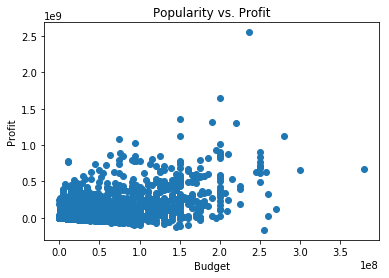

In [10]:
#Scatter plot on how budget and proft are related
plt.scatter(movies['budget'], movies['profit'])
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Popularity vs. Profit')

Analysis here-
seems to be a generally increasing trend

Text(0.5,1,'Popularity vs. Budget')

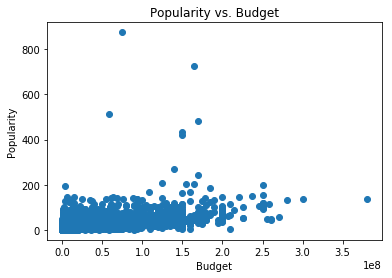

In [11]:
#Scatter plot on how budget and popularity are related
plt.scatter(movies['budget'], movies['popularity'])
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.title('Popularity vs. Budget')

Analysis here- seems to be not much of a correlation

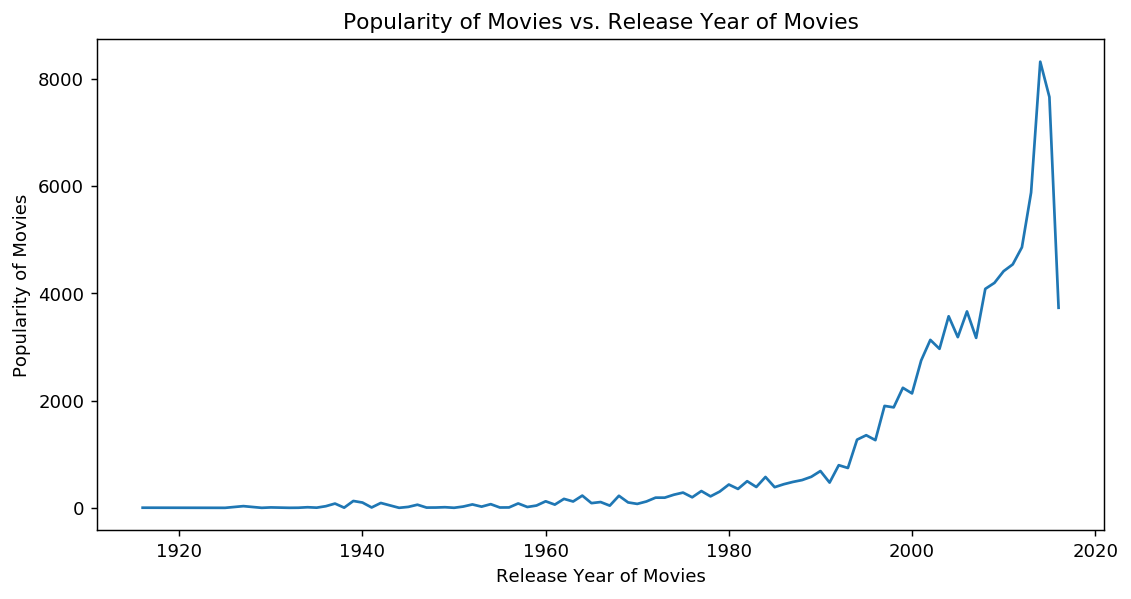

In [12]:
popularity_year = movies.groupby('release_year')['popularity'].sum()

#figure size(width, height)
plt.figure(figsize=(10,5), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies', fontsize = 10)
#on y-axis
plt.ylabel('Popularity of Movies', fontsize = 10)
#title of the line plot
plt.title('Popularity of Movies vs. Release Year of Movies')

#plotting the graph
plt.plot(popularity_year)

#displaying the line plot
plt.show()

In [13]:
#Finds which year the max popularity occurred 
popularity_year.idxmax()

2014

Analysis here- most popular year of movies is 2014

In [14]:
#Genre Analysis

# formatting the data in the genres columns.
movies['genres']=movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres']=movies['genres'].str.split(',')
movies.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,profit,release_year,movie_id,cast,crew
0,237000000.0,"[uAction, uAdventure, uFantasy, uScienceFiction]",19995,en,Avatar,150.437577,"[u'Ingenious Film Partners', u'Twentieth Centu...","[u'United States of America', u'United Kingdom']",2009-12-10,2.787965e+09,162.0,"[u'English', u'Espa\xf1ol']",Released,7.2,11800,2.550965e+09,2009,19995.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000.0,"[uAdventure, uFantasy, uAction]",285,en,Pirates of the Caribbean: At World's End,139.082615,"[u'Walt Disney Pictures', u'Jerry Bruckheimer ...",[u'United States of America'],2007-05-19,9.610000e+08,169.0,[u'English'],Released,6.9,4500,6.610000e+08,2007,285.0,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000.0,"[uAction, uAdventure, uCrime]",206647,en,Spectre,107.376788,"[u'Columbia Pictures', u'Danjaq', u'B24']","[u'United Kingdom', u'United States of America']",2015-10-26,8.806746e+08,148.0,"[u'Fran\xe7ais', u'English', u'Espa\xf1ol', u'...",Released,6.3,4466,6.356746e+08,2015,206647.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000.0,"[uAction, uCrime, uDrama, uThriller]",49026,en,The Dark Knight Rises,112.312950,"[u'Legendary Pictures', u'Warner Bros.', u'DC ...",[u'United States of America'],2012-07-16,1.084939e+09,165.0,[u'English'],Released,7.6,9106,8.349391e+08,2012,49026.0,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000.0,"[uAction, uAdventure, uScienceFiction]",49529,en,John Carter,43.926995,[u'Walt Disney Pictures'],[u'United States of America'],2012-03-07,2.841391e+08,132.0,[u'English'],Released,6.1,2124,2.413910e+07,2012,49529.0,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


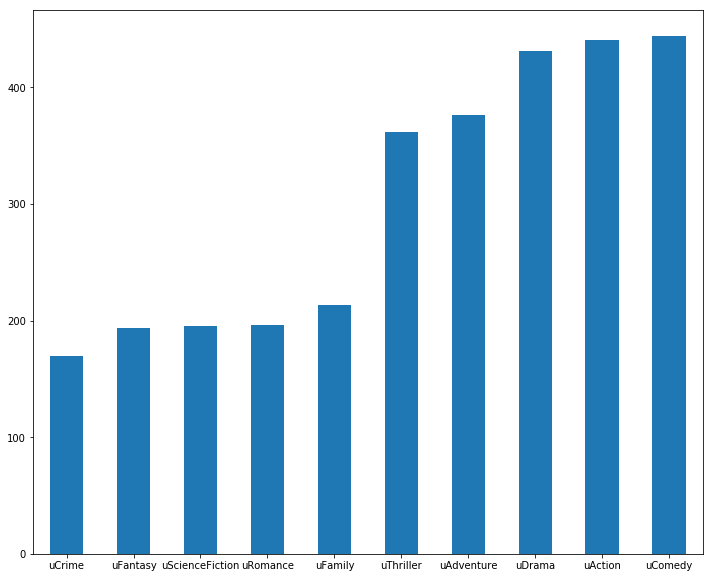

In [15]:
#selecting the movies having profit $50M or more
high_profits = movies[movies['profit'] >= 50000000]

#reindexing new data
high_profits.index = range(len(high_profits))

#we will start from 1 instead of 0
high_profits.index = high_profits.index + 1

plt.subplots(figsize=(12,10))
list1=[]


# extending the list of genres to collect all the genres of all the profitable movies
for i in high_profits['genres']:
    list1.extend(i)

    
genre_count_series = pd.Series(list1).value_counts()[:10].sort_values(ascending=True)

ax = genre_count_series.plot.bar(x='Genre', y='Profit', rot=0)

Graph analysis here